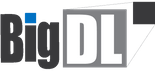

##### Copyright 2016 The BigDL Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

#  Tutorial of how to tune a forecasting model

Here, we use AutoformerForecaster and a common time series dataset [nyc_taxi](https://raw.githubusercontent.com/numenta/NAB/v1.0/data/realKnownCause/nyc_taxi.csv) to illustrate the overflow of how to tune a forecasting model.

##  step1 : prepare data

In [1]:
from sklearn.preprocessing import StandardScaler
from bigdl.chronos.data.repo_dataset import get_public_dataset

def get_tsdata():
    name = 'nyc_taxi'
    tsdata_train, tsdata_valid, tsdata_test = get_public_dataset(name)
    stand_scaler = StandardScaler()
    for tsdata in [tsdata_train, tsdata_valid, tsdata_test]:
        tsdata.impute(mode="linear")\
              .scale(stand_scaler, fit=(tsdata is tsdata_train))
    return tsdata_train, tsdata_valid, tsdata_test

tsdata_train, tsdata_valid, tsdata_test = get_tsdata()

train_data = tsdata_train.roll(lookback=20, horizon=1, time_enc=True, label_len=10).to_numpy()
val_data = tsdata_valid.roll(lookback=20, horizon=1, time_enc=True, label_len=10).to_numpy()
test_data = tsdata_test.roll(lookback=20, horizon=1, time_enc=True, label_len=10).to_numpy()

## step2 : define AutoformerForecaster with space parameters

In [2]:
import bigdl.nano.automl.hpo.space as space
from bigdl.chronos.forecaster.autoformer_forecaster import AutoformerForecaster

autoformer = AutoformerForecaster(input_feature_num=1,
                             output_feature_num=1,
                             past_seq_len=20,
                             future_seq_len=1,
                             label_len=10,
                             seed=1024,
                             freq='t',
                             loss="mse",
                             metrics=['mae', 'mse', 'mape'],
                             lr = space.Categorical(0.0001, 0.001, 0.01, 0.1),
                             d_model=space.Categorical(32, 64, 128, 256),
                             d_ff=space.Categorical(32, 64, 128, 256),
                             e_layers=space.Categorical(1,2),
                             n_head=space.Categorical(1,8))

autoformer.tune(train_data, validation_data=val_data,
                n_trials=3, target_metric='mse', direction="minimize",
                epochs=4, batch_size=32)

/home/cpx/ruonanw/BigDL/python/chronos/src/bigdl/chronos/forecaster/__init__.py:54: UserWarning: Please install `prophet` to use ProphetForecaster.
  warnings.warn("Please install `prophet` to use ProphetForecaster.")
/home/cpx/ruonanw/BigDL/python/chronos/src/bigdl/chronos/forecaster/__init__.py:59: UserWarning: Please install `pmdarima` to use ARIMAForecaster.
  warnings.warn("Please install `pmdarima` to use ARIMAForecaster.")
/home/cpx/ruonanw/BigDL/python/dllib/src/bigdl/dllib/utils/engine.py:47: UserWarning: Find both SPARK_HOME and pyspark. You may need to check whether they match with each other. SPARK_HOME environment variable is set to: /home/cpx/sgwhat/spark-2.4.3-bin-hadoop2.7, and pyspark is found in: /opt/anaconda3/envs/nano/lib/python3.7/site-packages/pyspark/__init__.py. If they are unmatched, please use one source only to avoid conflict. For example, you can unset SPARK_HOME and use pyspark only.
  warnings.warn(warning_msg)
/home/cpx/ruonanw/BigDL/python/dllib/src/big

Starting a new tuning
Adjusting learning rate of group 0 to 1.0000e-02.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Validation: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Validation: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 5.0000e-03.


Validation: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 2.5000e-03.


Validation: 0it [00:00, ?it/s]

[I 2022-08-14 16:27:00,231] Trial 0 finished with value: 0.028200466185808182 and parameters: {'d_ff▁choice': 0, 'd_model▁choice': 0, 'e_layers▁choice': 0, 'lr▁choice': 2, 'n_head▁choice': 1}. Best is trial 0 with value: 0.028200466185808182.
Global seed set to 1024
Global seed set to 1024


Adjusting learning rate of group 0 to 1.0000e-04.


Sanity Checking: 0it [00:00, ?it/s]

Training: 258it [00:00, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Validation: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.


Validation: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 5.0000e-05.


Validation: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 2.5000e-05.


Validation: 0it [00:00, ?it/s]

[I 2022-08-14 16:27:49,847] Trial 1 finished with value: 0.08314483612775803 and parameters: {'d_ff▁choice': 1, 'd_model▁choice': 1, 'e_layers▁choice': 1, 'lr▁choice': 0, 'n_head▁choice': 0}. Best is trial 0 with value: 0.028200466185808182.
Global seed set to 1024
Global seed set to 1024


Adjusting learning rate of group 0 to 1.0000e-02.


Sanity Checking: 0it [00:00, ?it/s]

Training: 258it [00:00, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Validation: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Validation: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 5.0000e-03.


Validation: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 2.5000e-03.


Validation: 0it [00:00, ?it/s]

[I 2022-08-14 16:28:31,266] Trial 2 finished with value: 0.032542891800403595 and parameters: {'d_ff▁choice': 0, 'd_model▁choice': 1, 'e_layers▁choice': 0, 'lr▁choice': 2, 'n_head▁choice': 0}. Best is trial 0 with value: 0.028200466185808182.
Global seed set to 1024
Global seed set to 1024


Then, you can see the whole trial history by calling search_summary().

In [3]:
autoformer.search_summary()

Number of finished trials: 3
Best trial:
  Value: 0.028200466185808182
  Params: 
    d_ff▁choice: 0
    d_model▁choice: 0
    e_layers▁choice: 0
    lr▁choice: 2
    n_head▁choice: 1


After tuning, the model parameters of autoformer is initialized according to the best trial params. You need to fit the model again.

### step 3 : fit and evaluate of model

In [4]:
autoformer.fit(train_data, epochs=4, batch_size=32)
# evaluate on val set
evaluate = autoformer.evaluate(val_data)
print(evaluate)


  | Name  | Type       | Params
-------------------------------------
0 | model | AutoFormer | 17.5 K
1 | loss  | MSELoss    | 0     
-------------------------------------
17.5 K    Trainable params
0         Non-trainable params
17.5 K    Total params
0.070     Total estimated model params size (MB)


Adjusting learning rate of group 0 to 1.0000e-02.


Sanity Checking: 0it [00:00, ?it/s]

Training: 258it [00:00, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Validation: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.


Validation: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 5.0000e-03.


Validation: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 2.5000e-03.


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         Validate metric                     DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
             val/loss                    0.028200466185808182
     val/mean_absolute_error             0.12635527551174164
val/mean_absolute_percentage_error        2.2643215656280518
      val/mean_squared_error             0.028200466185808182
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
[{'val/loss': 0.028200466185808182, 'val/mean_absolute_error': 0.12635527551174164, 'val/mean_squared_error': 0.028200466185808182, 'val/mean_absolute_percentage_error': 2.2643215656280518}]


## step4: save and load
After tuning and training, you can save your model by one line of code.

In [5]:
autoformer.save("best.ckpt")

Then, when you need to load, just call .load() func. Or if there is a new session, just define a new forecaster and load.

In [7]:
autoformer.load("best.ckpt")
# evaluate on val set
evaluate = autoformer.evaluate(val_data)
print(evaluate)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Global seed set to 1024


Validation: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss           0.028200466185808182
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
[{'val_loss': 0.028200466185808182}]


In [8]:
newformer = AutoformerForecaster(input_feature_num=1,
                                 output_feature_num=1,
                                 past_seq_len=20,
                                 future_seq_len=1,
                                 label_len=10,
                                 seed=1024,
                                 freq='t',
                                 loss="mse",
                                 metrics=['mae', 'mse', 'mape'])
newformer.load("best.ckpt")
# evaluate on val set
evaluate = newformer.evaluate(val_data)
print(evaluate)

Global seed set to 1024
/home/cpx/ruonanw/BigDL/python/chronos/src/bigdl/chronos/forecaster/autoformer_forecaster.py:169: UserWarning: HPO is enabled but no spaces is specified, so disable HPO.
  warnings.warn("HPO is enabled but no spaces is specified, so disable HPO.")
Global seed set to 1024
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Global seed set to 1024


Validation: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss           0.028200466185808182
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
[{'val_loss': 0.028200466185808182}]
